# Segundo Examen Parcial
### Estimación Óptima 

### Estudiantes:
- Clara Paola Aguilar Casillas

- Samantha Sánchez Tinoco

- Priscila Cervantes Ramírez

- Rafael Takata García

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV

Importamos los datos e información básica sobre estos:

In [2]:
df = pd.read_csv('data/datos_gente.csv')
df.head()

,altura,ancho,pie
0,185,55,28.0
1,173,44,26.5
2,163,44,24.0
3,162,44,24.5
4,172,46,27.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   altura  18 non-null     int64  
 1   ancho   18 non-null     int64  
 2   pie     18 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 564.0 bytes


In [4]:
df.describe()

,altura,ancho,pie
count,18.000000,18.000000,18.000000
mean,167.111111,45.222222,25.277778
std,10.208929,6.664706,2.170811
min,150.000000,38.000000,22.000000
25%,159.750000,40.000000,24.000000
50%,165.500000,44.000000,24.500000
75%,172.750000,48.750000,27.375000
max,187.000000,61.000000,29.000000


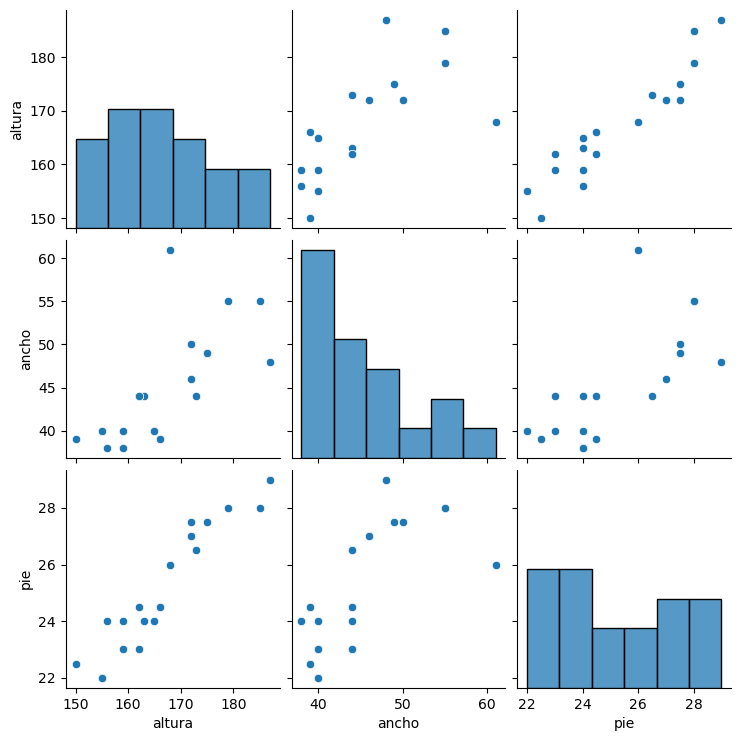

In [5]:
sns.pairplot(df)

<Axes: >

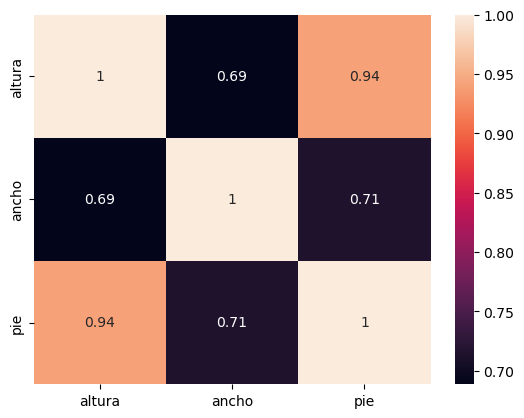

In [6]:
sns.heatmap(df.corr(), annot=True)

Después de un muy básico analisis inicial podemos ver que:

- Tenemos 18 entradas
- No hay datos faltantes
- Dos variables son de tipo `Int` y una `Float`
- Son relaciones lineales, altamente correlacionadas


---

Ahora empezaremos con la separación de los datos para nuestro modelo.

In [7]:
X = df[['ancho', 'pie']]
y = df['altura']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

En este caso, nosotros hemos propuesto tres modelos iniciales.

- Una Regresión lineal sin regularización

- Ridge

- Lasso

In [8]:
#Regresión lineal
#Entrenamiento
lr = LinearRegression()
lr.fit(X_train, y_train)

#Predicción
y_test_pred = lr.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

#Resultados
print(f"Error cuadrático medio en prueba: {mse_test:.4f}")
print(f"R² en prueba: {r2_test:.4f}")

print(f"Pendiente: {lr.coef_[0]}")
print(f"Intercepción: {lr.intercept_}")

Error cuadrático medio en prueba: 11.6061
R² en prueba: 0.8425
Pendiente: -0.0031472081218277977
Intercepción: 54.28434702353481


In [9]:
#Ridge
#Entrenamiento
ridge = Ridge()
ridge.fit(X_train, y_train)

#Predicción
y_test_pred = ridge.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

#Resultados
print(f"Error cuadrático medio en prueba: {mse_test:.4f}")
print(f"R² en prueba: {r2_test:.4f}")

print(f"Pendiente: {ridge.coef_[0]}")
print(f"Intercepción: {ridge.intercept_}")

Error cuadrático medio en prueba: 11.3509
R² en prueba: 0.8459
Pendiente: 0.024043647645113467
Intercepción: 56.545484126913365


In [10]:
#Lasso
#Entrenamiento
lasso = Lasso()
lasso.fit(X_train, y_train)

#Predicción
y_test_pred = lasso.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

#Resultados
print(f"Error cuadrático medio en prueba: {mse_test:.4f}")
print(f"R² en prueba: {r2_test:.4f}")

print(f"Pendiente: {lasso.coef_[0]}")
print(f"Intercepción: {lasso.intercept_}")

Error cuadrático medio en prueba: 11.3108
R² en prueba: 0.8465
Pendiente: 0.03718503995685833
Intercepción: 60.24261755999828


Obtuvimos resultados muy similares en primera instancia, veamos si a través del tuneo de híperparametros obtenemos mejores resultados:

---
Ridge

In [11]:
#Definimos el espacio de busqueda
alphas = np.logspace(0, 10, 100)

#Parametros y busqueda
param_grid = {'alpha': alphas}
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

#Mejor alpha
best_alpha = grid_search.best_params_['alpha']
print(f"Mejor alpha encontrado: {best_alpha}")

Mejor alpha encontrado: 1.5922827933410924


Veamos los resultados con el alpha optimizado a través del grid search:

In [12]:
ridge = Ridge(alpha=best_alpha)
ridge.fit(X_train, y_train)

#Predicción
y_test_pred = ridge.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

#Resultados
print(f"Error cuadrático medio en prueba: {mse_test:.4f}")
print(f"R² en prueba: {r2_test:.4f}")

print(f"Pendiente: {ridge.coef_[0]}")
print(f"Intercepción: {ridge.intercept_}")

Error cuadrático medio en prueba: 11.2384
R² en prueba: 0.8474
Pendiente: 0.03929014437173918
Intercepción: 57.818821907544816


Los resultados no cambian mucho pero, si obtenemos mejores resultados en la prueba y el testing.

Lasso

In [13]:
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

#Mejor alpha
best_alpha = grid_search.best_params_['alpha']
print(f"Mejor alpha encontrado: {best_alpha}")

Mejor alpha encontrado: 1.5922827933410924


In [14]:
lasso = Lasso(alpha=best_alpha)
lasso.fit(X_train, y_train)

#Predicción
y_test_pred = lasso.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

#Resultados
print(f"Error cuadrático medio en prueba: {mse_test:.4f}")
print(f"R² en prueba: {r2_test:.4f}")

print(f"Pendiente: {lasso.coef_[0]}")
print(f"Intercepción: {lasso.intercept_}")

Error cuadrático medio en prueba: 11.3785
R² en prueba: 0.8455
Pendiente: 0.06099087779669846
Intercepción: 63.7708782039431


### Evaluación

Después del fine-tuning, podemos observar que el modelo que nos da mejores resultados en la prueba es `Ridge` después de que realizaramos la optimización.

1. Realiza la gráfica de tu modelo con un scatterplot de los datos incluyendo el valor de R2 y RMSE.

a. ¿Por qué seleccionaste ese modelo?

Como se mencionó anteriormente se seleccionó el modelo de **Ridge** ya que fue el que nos dio mejores resultados, y se seleccionó un modelo múltiple ya que estaremos trabajando con las dos variables independientes ('ancho','pie') para obtener mejores resultados de la dependiente ('altura') o a predecir.

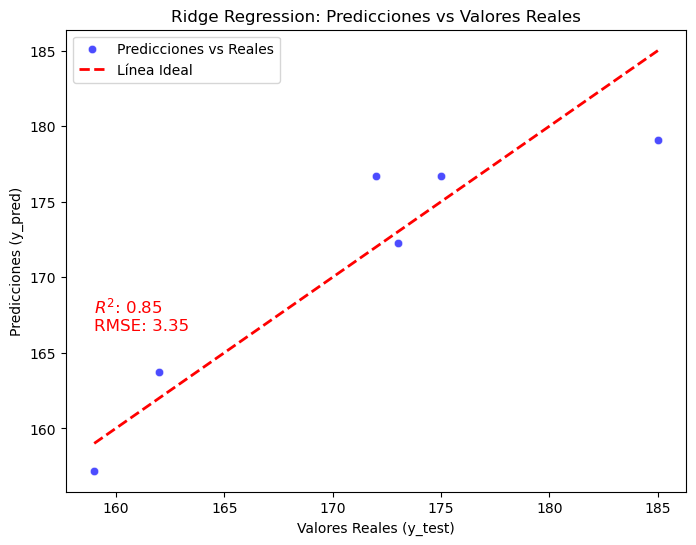

In [15]:
# Predicciones del modelo
y_pred = ridge.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Gráfico de dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, label="Predicciones vs Reales", color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Línea Ideal")

# Agregar valores de R² y RMSE a la gráfica
plt.text(y_test.min(), y_test.max() * 0.9, f"$R^2$: {r2:.2f}\nRMSE: {rmse:.2f}", fontsize=12, color="red")

# Etiquetas y título
plt.xlabel("Valores Reales (y_test)")
plt.ylabel("Predicciones (y_pred)")
plt.title("Ridge Regression: Predicciones vs Valores Reales")
plt.legend()
plt.show()

Podemos observar que el modelo explica en un 85% de la variabilidad de los datos de prueba, eso nos quiere decir que no está tan mal pero podría mejorar.

Por otro lado las predicciones del modelo están a 3.35 valores, esto nos indica que tenemos varios outliers altos que nos está afectando nuestro modelo. 


b. ¿Utilizaste alguna regularización?

El algoritmo propuesto usa una regularización L2 o de Ridge, en este caso, con un alpha de: $1.5922827933410924$ Con esto, podemos evitar el sobreajuste y mejorar la calidad de nuestras predicciones.

2. Se te solicita que tu modelo sea tropicalizado a la población de estudiantes del iteso. Realiza la gráfica de tu propuesta con un scatterplot de los datos incluyendo el valor de R2 y RMSE.

a. ¿Agregarías datos a tu base de datos para mejorar las predicciones del modelo?

Sí, como nuestra base de datos inicial es pequeña, el rendimiento del modelo no es lo suficientemente bueno.

Es por esto que, se agregaron más datos a nuestra base ya que, con los anteriores no eran  suficientes para poder realizar predicciones de la mejor manera y se concentraba en el promedio de la mayoría de las personas que tomamos las medidas principales (el promedio de la muestra). Esto hacía que con los valores atípicos las predicciones no se le acercaban en los valores reales en lo más mínimo. Al agregar más datos se amplía el panorama para poder mejorar el modelo. 

In [16]:
#Solo tenemos 18 muestras
df.shape

(18, 3)

b. ¿Cómo conseguirías dicha información?

La información se podría obtener a través de las mediciones de los alumnos del iteso, no necesariamente que conozcamos, sino recaudar más infromación posible, acercándonos a preguntarles. 

Otra manera sería la creación de datos sínteticos que asemejen a los outliers o aquellos datos que tenemos pocos.

En esta práctica, hemos tomado más muestras de alumnos obteniendo el siguiente resultado:

In [17]:
df_amp = pd.read_csv('data/datos_gente_nuevo.csv')
df_amp.shape

(99, 3)

Es un dataframe con 99 muestras, lo que amplia mucho más el panorama y nuestra información para el modelo.

c. ¿Modificarías algún parámetro de tu modelo?

Sí, al añadir datos a nuestro modelo y mantener el alpha actual, al momento de hacer el entrenamiento y debido a la cantidad nueva de datos disponibles, podríamos caer nuevamente en un sobreajuste y sería necesario el buscar otro alpha que evite el overfitting.

Nuestros datos nuevos (obtenidos a través de medición empirica de los estudiantes) se ve así:

<Axes: >

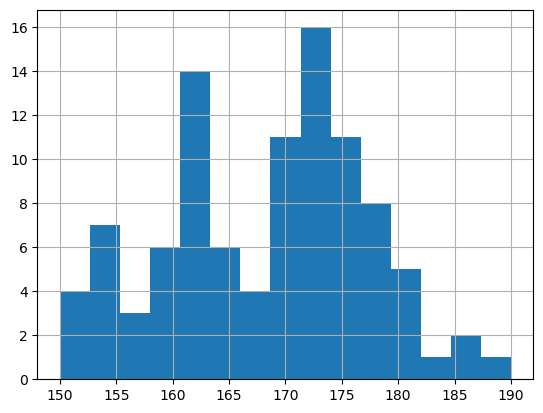

In [18]:
df_amp['altura'].hist(bins=15)

Podemos apreciar que, a pesar de las nuevas muestras, seguimos teniendo muy poca información de las personas que miden más de 175 y menos de 160. Podemos crear modelos enfocados solo a estas alturas y crear copias sínteticas para su entrenamiento.

Esto mejoraría la calidad de nuestras predicciones en estos rangos de altura.

### Creación de los modelos enfocados a outliers:

In [19]:
df_menor = df_amp[df_amp['altura'] < 160]
df_mayor = df_amp[df_amp['altura'] > 175]

df_menor.shape, df_mayor.shape

((17, 3), (19, 3))

A pesar de representar rangos de altura de 10 cm o más, solo tienen una concentración del 20% o menos de nuestros datos en cada una.

Ahora creamos los datos sínteticos:

#### Menor

In [20]:
df_menor.mean(), df_menor.std()

(altura    154.588235
 ancho      40.058824
 pie        23.117647
 dtype: float64,
 altura    2.895229
 ancho     3.051036
 pie       0.820240
 dtype: float64)

Ahora solo nos apoyamos de herramientas como numpy para la creación síntetica de los datos:

In [21]:
#Garantizamos los mismos resultados para que no dependan de la aleatoriedad del generador
np.random.seed(42)

In [22]:
altura_m = np.sort(np.round(np.random.normal(loc=154.58823529411765, scale=2.895229341723462, size=100), 0))
ancho_m = np.sort(np.round(np.random.normal(loc=40.058824, scale=3.051036, size=100), 0))
pie_m = np.sort(np.round(np.random.normal(loc=23.117647, scale=0.820240, size=100), 1))
df_menor_sintetico = pd.DataFrame({'altura': altura_m, 'ancho': ancho_m, 'pie': pie_m})
df_menor_sintetico.head()

,altura,ancho,pie
0,147.0,34.0,20.5
1,149.0,35.0,21.5
2,149.0,35.0,21.5
3,149.0,35.0,21.6
4,149.0,36.0,21.8


### Mayor

In [23]:
df_mayor.mean(), df_mayor.std()

(altura    180.105263
 ancho      49.263158
 pie        27.657895
 dtype: float64,
 altura    3.695263
 ancho     4.805577
 pie       1.014515
 dtype: float64)

In [24]:
altura_M = np.sort(np.round(np.random.normal(loc=180.105263, scale=3.695263, size=100), 0))
ancho_M = np.sort(np.round(np.random.normal(loc=49.263158, scale=4.805577, size=100), 0))
pie_M = np.sort(np.round(np.random.normal(loc=27.657895, scale=1.014515, size=100), 1))
df_mayor_sintetico = pd.DataFrame({'altura': altura_M, 'ancho': ancho_M, 'pie': pie_M})
df_mayor_sintetico.head()

,altura,ancho,pie
0,172.0,38.0,25.2
1,174.0,39.0,25.4
2,175.0,39.0,25.6
3,175.0,41.0,25.8
4,175.0,41.0,25.8


### Media

Para no generar un desbalanceo, debemos de crear datos sínteticos en la media tambien

In [25]:
df_media = df_amp[(df_amp['altura'] > 160) & (df_amp['altura'] < 175)]
df_media.shape #Hacen falta mínimo unos 67 datos

(55, 3)

In [26]:
df_media.mean(), df_media.std()

(altura    168.090909
 ancho      44.254545
 pie        25.272727
 dtype: float64,
 altura    4.551242
 ancho     4.074392
 pie       1.426658
 dtype: float64)

In [27]:
#En este caso, usamos la mediana en vez de la media 
altura_media = np.sort(np.round(np.random.normal(loc=167.5, scale=2.13, size=67), 0)) 
ancho_media = np.sort(np.round(np.random.normal(loc=44.5, scale=2.01, size=67), 0))
pie_media = np.sort(np.round(np.random.normal(loc=26, scale=1.19, size=67), 1))
df_media_sint = pd.DataFrame({'altura': altura_media, 'ancho': ancho_media, 'pie': pie_media})
df_media_sint.head()

,altura,ancho,pie
0,162.0,39.0,23.8
1,164.0,40.0,24.0
2,164.0,40.0,24.1
3,164.0,41.0,24.3
4,164.0,41.0,24.4


In [28]:
altura_media = np.sort(np.round(np.random.normal(loc=168.090909, scale=4.551242, size=67), 0)) 
ancho_media = np.sort(np.round(np.random.normal(loc=44.254545, scale=4.074392, size=67), 0))
pie_media = np.sort(np.round(np.random.normal(loc=25.272727, scale=1.426658, size=67), 1))
df_media_sint = pd.DataFrame({'altura': altura_media, 'ancho': ancho_media, 'pie': pie_media})
df_media_sint.head()

,altura,ancho,pie
0,161.0,35.0,21.8
1,161.0,38.0,22.4
2,162.0,38.0,22.6
3,163.0,39.0,23.0
4,164.0,39.0,23.1


### Dataframe junto

Gracias a las nuevas muestras, tanto reales como sínteticas, podemos obtener este dataframe nuevo:

In [29]:
df_amp_sint = pd.concat([df_media_sint, df_menor_sintetico, df_mayor_sintetico], ignore_index=True)
df_amp_sint.shape

(267, 3)

Ahora tenemos un dataframe con casí 300 muestras y que, su distribución de alturas se ve así:

<Axes: >

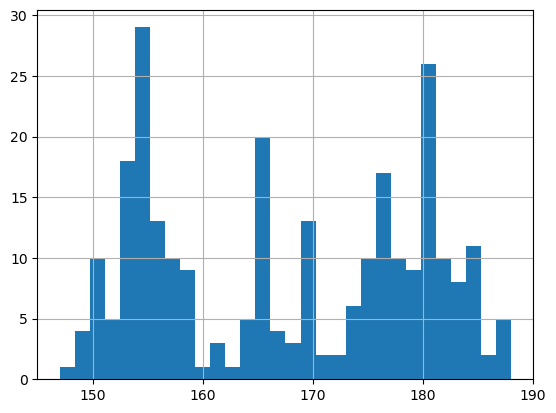

In [30]:
df_amp_sint['altura'].hist(bins=30)

Esta distribución ya representa más información en los datos donde no teniamos información. Además, tenemos los datos separados en menores y mayores donde nuestra primera muestra de la población carecía de entradas por lo que, ahora podemos entrenar modelos especificos para estos rangos o mejorar la calidad de un algoritmo general.

Veamos como funciona nuestro modelo tomando estos datos, representando de mejor forma la población general del ITESO:

Primero separamos en entrenamiento y prueba:

In [31]:
X = df_amp_sint[['ancho','pie']]
y = df_amp_sint['altura']
X_train_iteso, X_test_iteso, y_train_iteso, y_test_iteso = train_test_split(X, y, test_size = 0.2, random_state = 42)

Entrenamos y buscamos el mejor alpha:

In [32]:
ridge_iteso = Ridge()
grid_search = GridSearchCV(ridge_iteso, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_iteso, y_train_iteso)
best_alpha_iteso = grid_search.best_params_['alpha']
print(f"Mejor alpha encontrado: {best_alpha_iteso}")

Mejor alpha encontrado: 1.0


In [33]:
ridge_iteso = Ridge(best_alpha_iteso)
ridge_iteso.fit(X_train_iteso, y_train_iteso)
y_pred_iteso = ridge_iteso.predict(X_test_iteso)
r2 = r2_score(y_test_iteso, y_pred_iteso)
rmse = np.sqrt(mean_squared_error(y_test_iteso, y_pred_iteso))
print("R2", r2, 'RMSE', rmse)

R2 0.9612139521745917 RMSE 2.3177031548053977


Obtenemos buenos resultados en el R2 que no muestrns un sobreajuste claro, sin embargo, el RMSE es bastante alto. Veamos como se ve la gráfica de los resultados:

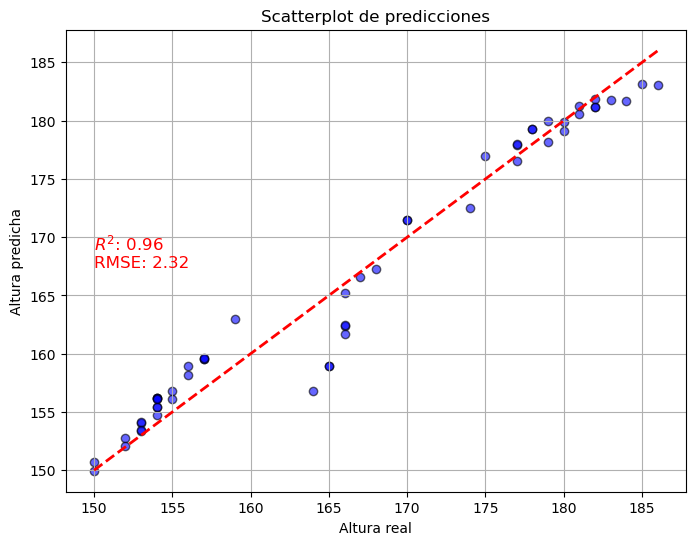

In [34]:
plt.figure(figsize=(8, 6))
plt.scatter(x=y_test_iteso, y=y_pred_iteso, alpha=0.6, edgecolors='k',label="Predicciones vs Reales", color="blue")
plt.plot([y_test_iteso.min(), y_test_iteso.max()], [y_test_iteso.min(), y_test_iteso.max()], 'r--', lw=2,label="Línea Ideal")  # Línea de referencia
plt.xlabel("Altura real")
plt.ylabel("Altura predicha")
plt.title(f"Scatterplot de predicciones")
plt.text(y_test_iteso.min(), y_test_iteso.max() * 0.9, f"$R^2$: {r2:.2f}\nRMSE: {rmse:.2f}", fontsize=12, color="red")
plt.grid(True)
plt.show()

La mayoría de los errores se encuentran en donde era la media de nuestros valores reales, por lo que tal vez sea recomendable separar en 3 modelos de predicción. Los sínteticos menores, los normales y los mayores.

### Creación de los 3 modelos separados:

Modelo de los menores:

In [35]:
X = df_menor_sintetico[['ancho','pie']]
y = df_menor_sintetico['altura']
X_train_menor, X_test_menor, y_train_menor, y_test_menor = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [36]:
ridge_menor = Ridge()
grid_search = GridSearchCV(ridge_menor, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_menor, y_train_menor)
best_alpha_menor = grid_search.best_params_['alpha']
print(f"Mejor alpha encontrado: {best_alpha_menor}")

Mejor alpha encontrado: 2.535364493970112


In [37]:
ridge_menor = Ridge(best_alpha_menor)
ridge_menor.fit(X_train_menor, y_train_menor)
y_pred_menor = ridge_menor.predict(X_test_menor)
r2 = r2_score(y_test_menor, y_pred_menor)
rmse = np.sqrt(mean_squared_error(y_test_menor, y_pred_menor))
print("R2", r2, 'RMSE', rmse)

R2 0.9436357795918601 RMSE 0.6496361291568902


Estos resultados muestran un claro sobreajuste, podemos mover las alphas para evitar el overfitting.

In [38]:
alphas_test = np.linspace(1, 200, 10)
for alpha in alphas_test:
    ridge_menor = Ridge(alpha=alpha)
    ridge_menor.fit(X_train_menor, y_train_menor)
    y_pred_menor = ridge_menor.predict(X_test_menor)
    r2_menor = r2_score(y_test_menor, y_pred_menor)
    rmse_menor = np.sqrt(mean_squared_error(y_test_menor, y_pred_menor))
    print("alpha", alpha, "R2", r2_menor, 'RMSE', rmse_menor)

alpha 1.0 R2 0.9525103232419085 RMSE 0.5963044144782175
alpha 23.11111111111111 R2 0.9199552811998123 RMSE 0.7741671860886417
alpha 45.22222222222222 R2 0.9103270481802812 RMSE 0.8194060206943472
alpha 67.33333333333333 R2 0.9014534422512522 RMSE 0.8589920553437902
alpha 89.44444444444444 R2 0.8925195728339553 RMSE 0.8970839974081353
alpha 111.55555555555556 R2 0.8834077706011008 RMSE 0.9343362979271745
alpha 133.66666666666666 R2 0.8741210317932538 RMSE 0.9708340612318936
alpha 155.77777777777777 R2 0.8646911872482893 RMSE 1.0065409755585877
alpha 177.88888888888889 R2 0.8551558527309983 RMSE 1.0414031652902975
alpha 200.0 R2 0.8455513877476604 RMSE 1.0753762059109329


Creemos que el que tiene un `R2` de 0.901 puede ser un buen alpha.

In [39]:
ridge_menor = Ridge(alpha=67.3)
ridge_menor.fit(X_train_menor, y_train_menor)
y_pred_menor = ridge_menor.predict(X_test_menor)
r2_menor = r2_score(y_test_menor, y_pred_menor)
rmse_menor = np.sqrt(mean_squared_error(y_test_menor, y_pred_menor))
print("R2", r2_menor, 'RMSE', rmse_menor)

R2 0.9014668042701455 RMSE 0.8589338176060397


Modelo de la media 'real':

In [40]:
X = df_media_sint[['ancho','pie']]
y = df_media_sint['altura']
X_train_media, X_test_media, y_train_media, y_test_media = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [41]:
ridge_media = Ridge()
grid_search = GridSearchCV(ridge_media, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_media, y_train_media)
best_alpha_media = grid_search.best_params_['alpha']
print(f"Mejor alpha encontrado: {best_alpha_media}")

Mejor alpha encontrado: 20.565123083486515


In [42]:
for alpha in alphas_test:
    ridge_media = Ridge(alpha=alpha)
    ridge_media.fit(X_train_media, y_train_media)
    y_pred_media = ridge_media.predict(X_test_media)
    r2_media = r2_score(y_test_media, y_pred_media)
    rmse_media = np.sqrt(mean_squared_error(y_test_media, y_pred_media))
    print("alpha", alpha, "R2", r2_media, 'RMSE', rmse_media)

alpha 1.0 R2 0.8825166026036829 RMSE 1.5299270804829197
alpha 23.11111111111111 R2 0.8969562697695366 RMSE 1.432825392309451
alpha 45.22222222222222 R2 0.9084613353964729 RMSE 1.350469467268458
alpha 67.33333333333333 R2 0.9175933136800949 RMSE 1.2813380085835921
alpha 89.44444444444444 R2 0.9246630737125617 RMSE 1.2251420099953063
alpha 111.55555555555556 R2 0.9299357150067946 RMSE 1.181492123222612
alpha 133.66666666666666 R2 0.9336400842119718 RMSE 1.149834662365328
alpha 155.77777777777777 R2 0.9359745626517519 RMSE 1.1294285462327633
alpha 177.88888888888889 R2 0.9371116198150832 RMSE 1.1193545986235531
alpha 200.0 R2 0.9372015667294907 RMSE 1.1185538265385233


Creemos que el que tiene un `R2` de 0.917 es el ideal para prevenir el sobreajuste.

In [43]:
ridge_media = Ridge(alpha=67.3)
ridge_media.fit(X_train_media, y_train_media)
y_pred_media = ridge_media.predict(X_test_media)
r2 = r2_score(y_test_media, y_pred_media)
rmse = np.sqrt(mean_squared_error(y_test_media, y_pred_media))
print("R2", r2, 'RMSE', rmse)

R2 0.9175811706714606 RMSE 1.2814324106646309


Modelo de los mayores:

In [44]:
X = df_mayor_sintetico[['ancho','pie']]
y = df_mayor_sintetico['altura']
X_train_mayor, X_test_mayor, y_train_mayor, y_test_mayor = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [45]:
ridge_mayor = Ridge()
grid_search = GridSearchCV(ridge_mayor, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_mayor, y_train_mayor)
best_alpha_mayor = grid_search.best_params_['alpha']
print(f"Mejor alpha encontrado: {best_alpha_mayor}")

Mejor alpha encontrado: 1.0


In [46]:
alphas_test = np.logspace(1, 4, 15)
for alpha in alphas_test:
    ridge_mayor = Ridge(alpha=alpha)
    ridge_mayor.fit(X_train_mayor, y_train_mayor)
    y_pred_mayor = ridge_mayor.predict(X_test_mayor)
    r2_mayor = r2_score(y_test_mayor, y_pred_mayor)
    rmse_mayor = np.sqrt(mean_squared_error(y_test_mayor, y_pred_mayor))
    print("alpha", alpha, "R2", r2_mayor, 'RMSE', rmse_mayor)

alpha 10.0 R2 0.9794418014343916 RMSE 0.45539085193992906
alpha 16.378937069540637 R2 0.9786483812672835 RMSE 0.4640953069858368
alpha 26.826957952797258 R2 0.977732285562313 RMSE 0.4739468001687199
alpha 43.939705607607905 R2 0.9764559330631881 RMSE 0.4873405126039595
alpha 71.96856730011521 R2 0.9743751037695514 RMSE 0.5084202402783063
alpha 117.87686347935866 R2 0.970620167610806 RMSE 0.5443978868676784
alpha 193.06977288832496 R2 0.9634408698683203 RMSE 0.6072810100796163
alpha 316.22776601683796 R2 0.9493948342120831 RMSE 0.7144785580306877
alpha 517.9474679231213 R2 0.9222867160827566 RMSE 0.8853997693218544
alpha 848.3428982440716 R2 0.8728090199043527 RMSE 1.132713119776955
alpha 1389.4954943731375 R2 0.7911006131461115 RMSE 1.451644779168995
alpha 2275.8459260747886 R2 0.6736137038920433 RMSE 1.8145031722179525
alpha 3727.593720314938 R2 0.5299256499073636 RMSE 2.1775846726498305
alpha 6105.402296585326 R2 0.3808494807348657 RMSE 2.49913602332627
alpha 10000.0 R2 0.24744458269

El alpha que usaremos es el que nos tiene un `R2` de $0.9222867160827566$

In [47]:
ridge_mayor = Ridge(alpha=517.94)
ridge_mayor.fit(X_train_mayor, y_train_mayor)
y_pred_mayor = ridge_mayor.predict(X_test_mayor)
r2_mayor = r2_score(y_test_mayor, y_pred_mayor)
rmse_mayor = np.sqrt(mean_squared_error(y_test_mayor, y_pred_mayor))
print("R2", r2_mayor, 'RMSE', rmse_mayor)

R2 0.9222877837230092 RMSE 0.8853936874036006


### Unión de los 3 modelos

In [48]:
df_menor_sintetico.describe()

,altura,ancho,pie
count,100.000000,100.000000,100.000000
mean,154.290000,40.150000,23.171000
std,2.663995,2.986079,0.893896
min,147.000000,34.000000,20.500000
25%,153.000000,38.000000,22.600000
50%,154.000000,40.000000,23.200000
75%,156.000000,42.000000,23.700000
max,160.000000,48.000000,26.300000


In [70]:
df_media_sint.describe()

,altura,ancho,pie
count,67.000000,67.000000,67.000000
mean,168.567164,45.492537,25.280597
std,4.239868,4.012757,1.390579
min,161.000000,35.000000,21.800000
25%,166.000000,43.000000,24.300000
50%,168.000000,45.000000,25.300000
75%,171.000000,49.000000,26.250000
max,179.000000,55.000000,27.900000


In [50]:
df_mayor_sintetico.describe()

,altura,ancho,pie
count,100.000000,100.00000,100.00000
mean,180.470000,49.02000,27.53800
std,3.288962,5.09898,0.93504
min,172.000000,38.00000,25.20000
25%,178.000000,45.00000,27.00000
50%,180.000000,49.00000,27.55000
75%,183.000000,52.00000,28.20000
max,188.000000,64.00000,30.00000


In [220]:
def modelos(x_test, modelos=[ridge_menor, ridge_media, ridge_mayor])-> pd.Series:
    predicciones = []
    for _, row in x_test.iterrows():
        predicciones_modelo = []
        pesos = []

        if row.iloc[0] <= 45 and row.iloc[1] <= 24:  
            prediccion = modelos[0].predict(row.values.reshape(1, -1))  
            predicciones_modelo.append(np.round(prediccion, 0))
            pesos.append(1)

        if 40 < row.iloc[0] < 50 and  22 < row.iloc[1] <= 26.5:
            prediccion = modelos[1].predict(row.values.reshape(1, -1))
            predicciones_modelo.append(np.round(prediccion, 0))
            #Agregamos pesos para mejorar la calidad de la probabilidad
            distancia_menor = abs(row.iloc[1] - 22) / 4.5 
            distancia_mayor = abs(row.iloc[1] - 26.5) / 4.5
            peso = np.exp(-1.5 * (distancia_menor + distancia_mayor))
            pesos.append(peso)

        if row.iloc[0] >= 43 and row.iloc[1] > 26:
            prediccion = modelos[2].predict(row.values.reshape(1, -1))
            predicciones_modelo.append(np.round(prediccion, 0))
            pesos.append(1)

        if predicciones_modelo:
            predicciones_modelo = np.array(predicciones_modelo).flatten()  
            pesos = np.array(pesos) / np.sum(pesos)  
            prediccion = np.dot(predicciones_modelo, pesos)
               
        else:
            prediccion = np.mean([modelo.predict(row.values.reshape(1, -1))[0] for modelo in modelos]) 
            
        predicciones.append(np.round(prediccion, 0))
    return  pd.Series(predicciones)

In [221]:
y_pred_mod = modelos(X_test_iteso)
r2_iteso = r2_score(y_test_iteso, y_pred_mod)
rmse_iteso = np.sqrt(mean_squared_error(y_test_iteso, y_pred_mod))
print(f'r2 {r2_iteso}, rmse {rmse_iteso}')

r2 0.9211106901700354, rmse 3.3054388401430037


c:\Users\Rafa\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
c:\Users\Rafa\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
c:\Users\Rafa\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
c:\Users\Rafa\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
c:\Users\Rafa\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
c:\Users\Rafa\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature nam

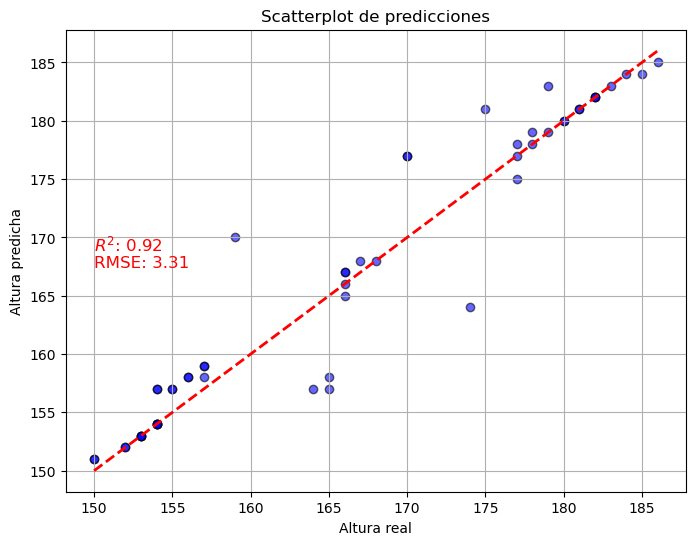

In [222]:
plt.figure(figsize=(8, 6))
plt.scatter(x=y_test_iteso, y=y_pred_mod, alpha=0.6, edgecolors='k',label="Predicciones vs Reales", color="blue")
plt.plot([y_test_iteso.min(), y_test_iteso.max()], [y_test_iteso.min(), y_test_iteso.max()], 'r--', lw=2,label="Línea Ideal")  # Línea de referencia
plt.xlabel("Altura real")
plt.ylabel("Altura predicha")
plt.title(f"Scatterplot de predicciones")
plt.text(y_test_iteso.min(), y_test_iteso.max() * 0.9, f"$R^2$: {r2_iteso:.2f}\nRMSE: {rmse_iteso:.2f}", fontsize=12, color="red")
plt.grid(True)
plt.show()

Podemos observar que, los errores se concentran principalmente en los lugares donde los modelos se juntan, por ejemplo: 160-165 y 170-175. Fuera de esos rangos, la predicción es muy buena.